In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dropout, Dense, Flatten
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_csv('Victim_Info_Unique.csv')

In [4]:
df

,Unnamed: 0,Victim_ID,Unit_ID,FIR_ID,Arr_ID,Injury_type,Major_Cause,Minor_Cause,IsPoliceOnDuty,IsSuicide,Suicide_Profile,Suicide_Status,Suicidal_Education_Status,Suicide_Adopted_Means,Place_Of_Missing,IsBurried,UserID,Action_Flag,DEDT,place
0,0,2014000001,57,2014000001,2014000002,1,0,0,0,0,3,0,0,0,not available,0,5900027,N,1/1/2014 1:42,not available
1,3,2014000001,111,2014000002,2014000011,1,0,0,0,0,10,98,0,0,not available,0,11100001,N,1/9/2014 14:20,not available
2,6,2014000001,136,2014000003,2014000010,1,0,0,0,0,1,0,0,0,not available,0,156400041,N,1/1/2014 20:32,not available
3,48,2014000001,429,2014000004,2014000013,1,0,0,0,0,1,98,0,0,not available,0,151000053,N,1/4/2014 12:22,not available
4,75,2014000001,718,2014000006,2014000041,1,0,0,0,0,2,98,0,0,not available,0,16000011,N,1/28/2014 13:40,not available
5,110,2014000001,976,2014000005,2014000010,1,0,0,0,0,10,0,0,0,not available,0,98800017,N,1/4/2014 17:11,not available
6,112,2014000001,985,2014000008,2014000025,1,0,0,0,0,10,0,0,0,not available,0,98500020,N,1/6/2014 14:27,not available
7,113,2014000001,988,2014000007,2014000019,1,0,0,0,0,10,0,0,0,not available,0,36400026,N,1/11/2014 9:34,not available
8,114,2014000001,992,2014000012,2014000044,1,0,0,0,0,9,97,0,0,not available,0,98300001,N,1/23/2014 23:23,not available
9,313,2014000002,348,2014000013,2014000053,1,0,0,0,0,10,98,0,0,not available,0,33400016,N,3/16/2014 20:09,not available


In [7]:
df['Date'] = df['DEDT'].apply(lambda x : x[:-5])

In [11]:
df['Date'] = df['Date'].apply(lambda x : x.split('/')[1]+'/'+x.split('/')[0]+'/'+x.split('/')[-1])

In [12]:
df['Time'] = df['DEDT'].apply(lambda x : x[-5:])

In [24]:
df = df.sort_values(by=['Date'],ascending=True)

In [59]:
val = df['Date'].value_counts()

In [61]:
dat = df['Date'].unique()

In [63]:
data = pd.DataFrame()

In [66]:
data['Date'] = dat
data['Accidents'] = [int(x) for x in val]

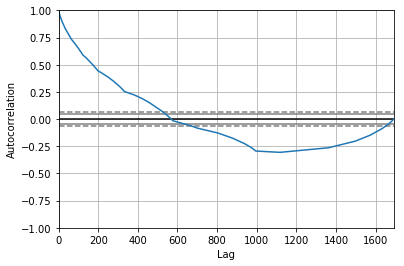

                             ARIMA Model Results                              
Dep. Variable:            D.Accidents   No. Observations:                 1690
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1950.391
Method:                       css-mle   S.D. of innovations              0.076
Date:                Sun, 17 Nov 2019   AIC                          -3886.782
Time:                        07:59:32   BIC                          -3848.755
Sample:                             1   HQIC                         -3872.700
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0060      0.002     -2.946      0.003      -0.010      -0.002
ar.L1.D.Accidents    -0.0050      0.024     -0.205      0.838      -0.053       0.043
ar.L2.D.Accidents    -0.

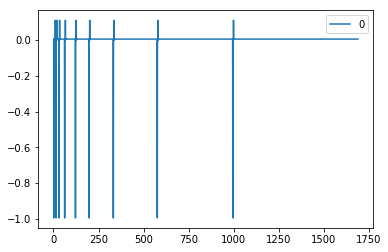

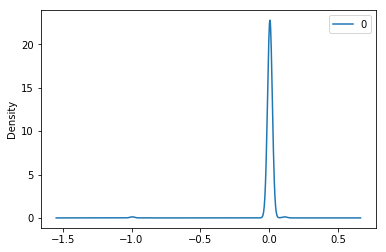

,0
count,1690.000000
mean,0.000051
std,0.076370
min,-0.994533
25%,0.005467
50%,0.005467
75%,0.005467
max,0.110819


In [75]:
from pandas.plotting import autocorrelation_plot as auto_plot
import matplotlib.pyplot as plt

auto_plot(data['Accidents'])
plt.show()

model = ARIMA(data['Accidents'], order=(5,1,0))
model_fit = model.fit(disp=0)
print model_fit.summary()

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
residuals.describe()

In [77]:
import pickle
from tensorflow import keras

In [78]:
from tensorflow.keras.models import load_model

model = load_model('categorical_model_relu')

Instructions for updating:
Colocations handled automatically by placer.


In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               22528     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 1285      
Total params: 352,517
Trainable params: 352,517
Non-trainable params: 0
_________________________________________________________________
